In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mpl

In [2]:
import matplotlib
%matplotlib inline

In [3]:
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


In [7]:
np.exp((1,2,5))

array([   2.71828183,    7.3890561 ,  148.4131591 ])

In [10]:
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)


In [16]:
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

In [22]:
np.random.normal(size=(5,5)).shape

(5, 5)

/home/babyostrich/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


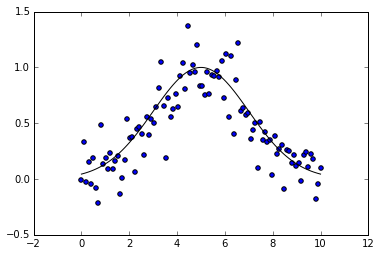

In [23]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
fig.savefig('model_and_noise.png')

In [25]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [28]:
print "optimized parameters=", popt
print pcov

optimized parameters= [ 0.96379584  5.05865785 -1.89682415]
[[  1.44695014e-03  -1.67475457e-06   1.92142840e-03]
 [ -1.67475457e-06   7.45605909e-03  -7.76846124e-06]
 [  1.92142840e-03  -7.76846124e-06   7.58225711e-03]]


In [31]:
ymodel = func(x, popt[0], popt[1], popt[2])
# this is the same thing as writing:
# ymodel = func(x, *popt)

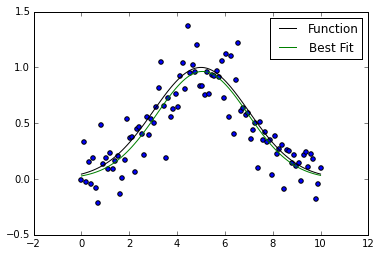

In [33]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.plot(x, ymodel, c='g', label='Best Fit')
ax.scatter(x, yn)
ax.legend()